Steps in KNN:   
1. Choose the number K and a distance metric.   
2. Given a data point, find the K-nearest neighbors from the training set.   
3. Assign the class label by majority vote.

In [9]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


from sklearn import datasets

from sklearn.neighbors import KNeighborsClassifier

In [10]:
# Load and normalize data
# Load data from sklearn
iris = datasets.load_iris()
# Select features. iris data is a 4-column matrix. Here, the last two columns are selected.
X = iris.data[:, [2,3]]
# Get labels. iris.target is a 1D array.
y = iris.target

# Split the original data
X_train, X_test, y_train, y_test = train_test_split(X ,y, test_size = 0.3, random_state=1, stratify=y)

# Feature scaling
# Create an object of 'StandardScaler' class.
sc = StandardScaler()
# Get the mean and standard deviation of the training set.
sc.fit(X_train)
# Rescale the training set
X_train_std = sc.transform(X_train)
# Rescale the testing set
X_test_std = sc.transform(X_test)
# The rescaling formular is z = (x - u) / s
X_std = sc.transform(X)

In [11]:
# Visualization
# Provide the testing data together with the original data.
def plot_decision_regions2(X, y, classifier, resolution=0.02, X_test=None):
    # Create lists of markers and colors
    markers = ('o', 's', '^', 'v', '<')
    colors = ('red', 'blue', 'yellow', 'green', 'grey')
    
    # np.unique: find the unique elements of an array
    # The output y only has two possible values, 0 and 1. Therefore np.unique(y) is 2.
    # Then colors[:len(np.unique(y))] is colors[:2], i.e., colors = ('red', 'blue')
    # This is suitable for discrete colors.
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    # Set the range 
    # The range of the figure is larger than the range of the features.
    # Prevent data points from lying on the edges of the figure.
    x1_min, x1_max = X[:,0].min() - 1, X[:,0].max() + 1 
    x2_min, x2_max = X[:,1].min() - 1, X[:,1].max() + 1 
    # Generate meshgrid
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))
    # np.ravel(): flatten an array. It returns a 1D-array
    # The input of the function 'predict' is X. Each column of X corresponds to a feature.
    # Therefore, after raveling, we need to transpose the array.
    # lab: labels for all grid points
    lab = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    # The output of 'predict' is a 1D-array. It is reshaped to have the same shape as xx1
    lab = lab.reshape(xx1.shape)
    
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    # alpha: control the transparency
    ax.contourf(xx1, xx2, lab, alpha=0.2, cmap=cmap)
    
    # Plot training examples
    # enumerate: 
    for idx, cl in enumerate(np.unique(y)):
        ax.scatter(x=X[y==cl,0], y=X[y==cl,1], alpha=1, c=colors[idx], marker=markers[idx], label='Class {}'.format(cl), edgecolor="black")
    
    
    # Circle testing examples
    ax.scatter(x=X_test[:,0], y=X_test[:,1], alpha=1, c='none', marker='o', label='Test set', edgecolor="black", linewidth=1, s=100)
    # s: marker size
    
    ax.legend()
        

In [12]:
knn = KNeighborsClassifier(n_neighbors=5, p=2, metric='minkowski')
knn.fit(X_train_std, y_train)
# Note that we used the rescaled data here. This is because we used Euclidean metric.
# The rescaled data makes sure that each feature contributes equally to the distance.
# The minkowski distance is a generalization of Euclidean distance. When p==2, minkowski==Euclidean.

KNeighborsClassifier()

C:\Users\bai_f\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


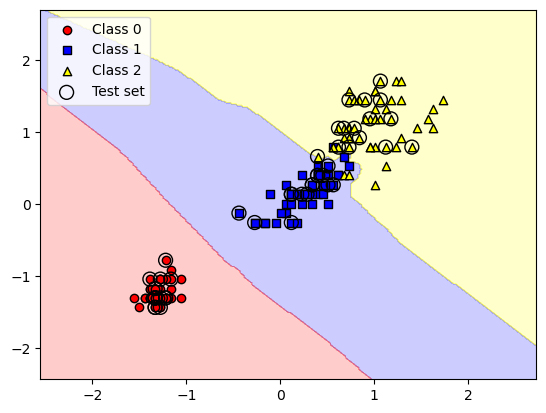

In [13]:
plot_decision_regions2(X_std, y, classifier=knn, resolution=0.02, X_test=X_test_std)